# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
unit = 'imperial'

url = f'{base_url}appid={weather_api_key}&units={unit}&q='

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
#create a new empty data frame
raw_city_df = pd.DataFrame()

#create lists that will fill the columns upon being called and filled
city = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind = []
country = []
date = []

In [45]:
#test

responce = requests.get(url + cities[1]).json()
responce

{'coord': {'lon': 20.0403, 'lat': -34.5322},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 55.4,
  'feels_like': 55.26,
  'temp_min': 55.4,
  'temp_max': 55.4,
  'pressure': 1020,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 2.3, 'deg': 10},
 'clouds': {'all': 59},
 'dt': 1616281190,
 'sys': {'type': 1,
  'id': 1966,
  'country': 'ZA',
  'sunrise': 1616301825,
  'sunset': 1616345412},
 'timezone': 7200,
 'id': 1015776,
 'name': 'Bredasdorp',
 'cod': 200}

In [46]:
#using the cities list, and the url; loop through and add city data to lists
#keep track of counts for cities with index
i = 0
for x in cities:
    #insert try/except in case the city name doesnt .get correctly
    if i < len(cities):
        i += 1
        try:
            responce = requests.get(url + x).json()
            print('request successful')
            city.append(responce['name'])
            print('request successful 1')
            lat.append(responce['coord']['lat'])
            print('request successful 2')
            lng.append(responce['coord']['lon'])
            print('request successful 3')
            max_temp.append(responce['main']['temp_max'])
            print('request successful 4')
            cloudiness.append(responce['clouds']['all'])
            print('request successful 5')
            humidity.append(responce['main']['humidity'])
            print('request successful 6')
            wind.append(responce['wind']['speed'])
            print('request successful 7')
            country.append(responce['sys']['country'])
            print('request successful 8')
            date.append(responce['dt'])
            print('request successful 9')
            
            
            
        except (KeyError, IndexError):
            print('not found, on to next')

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
not found, on to next
request successful
not found, on to next
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
requ

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
not found, on to next
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
req

request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
request successful 8
request successful 9
request successful
request successful 1
request successful 2
request successful 3
request successful 4
request successful 5
request successful 6
request successful 7
re

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
city_df = {
    'City Name': city,
    'Latitude': lat,
    'Longitude': lng,
    'Temp': max_temp,
    'Cloudiness': cloudiness,
    'Humidity': humidity,
    'Wind': wind,
    'Country': country,
    'Date': date
}
city_df = pd.DataFrame(city_df)

In [58]:
#  Get the indices of cities that have humidity over 100%.
# save to CSV file
city_df.to_csv('../output_data/cities.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../output_data/cities.csv'

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

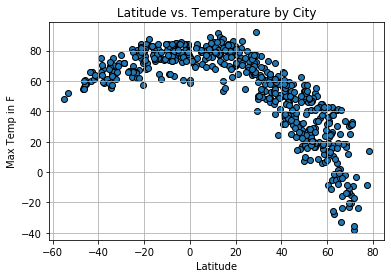

In [76]:
plt.scatter(city_df['Latitude'], city_df['Temp'], edgecolor='black')
plt.title('Latitude vs. Temperature by City')
plt.xlabel('Latitude')
plt.ylabel('Max Temp in F')
plt.grid()


## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

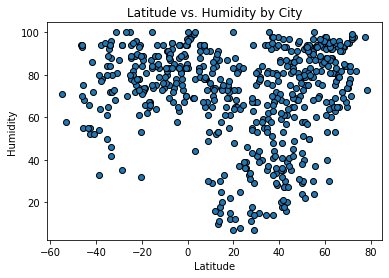

In [77]:
plt.scatter(city_df['Latitude'], city_df['Humidity'], edgecolor='black')
plt.title('Latitude vs. C by City')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

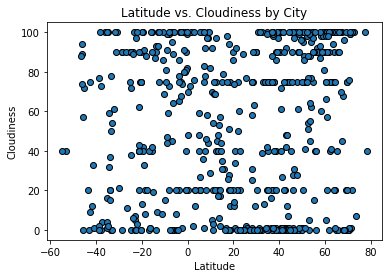

In [82]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'], edgecolor='black')
plt.title('Latitude vs. Cloudiness by City')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind')

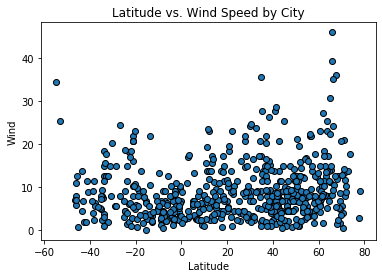

In [84]:
plt.scatter(city_df['Latitude'], city_df['Wind'], edgecolor='black')
plt.title('Latitude vs. Wind Speed by City')
plt.xlabel('Latitude')
plt.ylabel('Wind')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


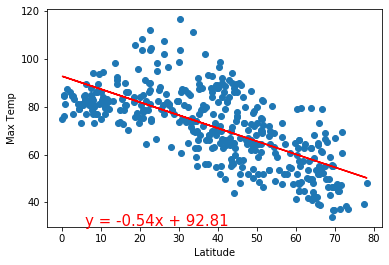

In [25]:
north_df = city_df.loc[city_df['Latitude'] > 0]


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


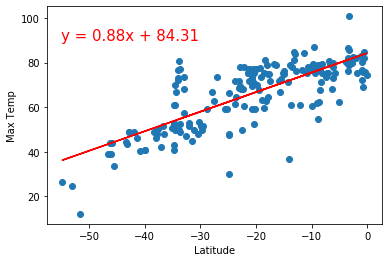

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


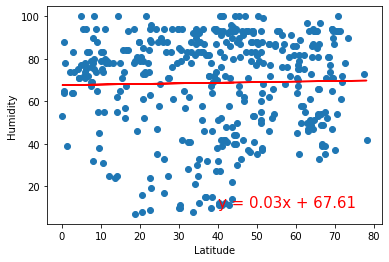

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


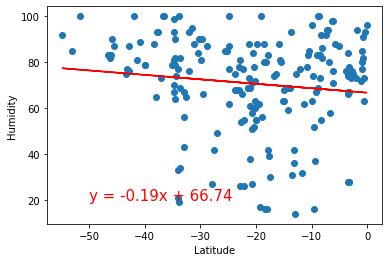

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


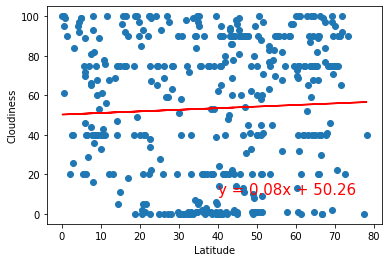

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


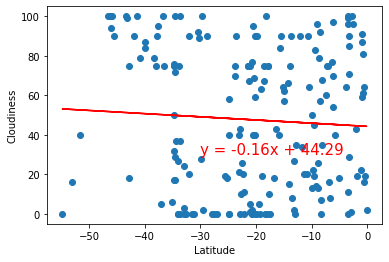

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


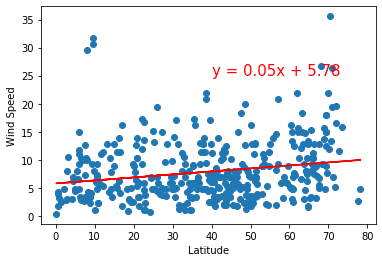

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


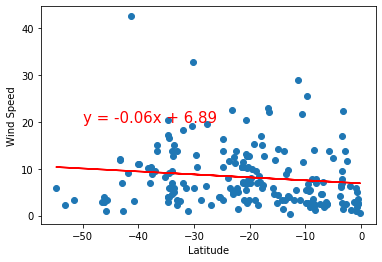